--- Model Parameters ---
Coefficient for Years_Exp: 10457.12
Coefficient for City_NYC: 10650.79
Intercept (Base): 18880.09

R-squared Score: 0.9443


/Users/rajagopalv/Documents/python-machinelearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rajagopalv/Documents/python-machinelearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


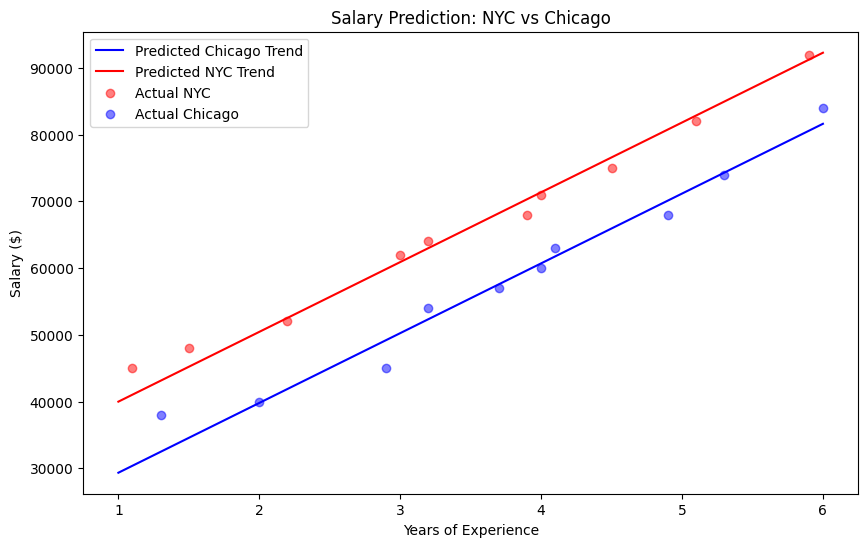

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. CREATE DATASET WITH LOCATION
# We simulate that NYC generally has a higher 'base' salary (cost of living)
data = {
    'Years_Exp': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 
                  3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0],
    'City': ['NYC', 'Chicago', 'NYC', 'Chicago', 'NYC', 'Chicago', 'NYC', 'Chicago', 'NYC', 'Chicago',
             'NYC', 'Chicago', 'NYC', 'Chicago', 'NYC', 'Chicago', 'NYC', 'Chicago', 'NYC', 'Chicago'],
    'Salary': [45000, 38000, 48000, 40000, 52000, 45000, 62000, 54000, 64000, 57000,
               68000, 60000, 71000, 63000, 75000, 68000, 82000, 74000, 92000, 84000]
}
df = pd.DataFrame(data)

# 2. ONE-HOT ENCODING
# This turns 'City' into 'City_NYC'. 
# If City_NYC is 1, they are in NYC. If 0, they are in Chicago.
df_encoded = pd.get_dummies(df, columns=['City'], drop_first=True)
print("df_encoded:",df_encoded)

# 3. PREPARE X AND Y
X = df_encoded.drop('Salary', axis=1) # Features: Years_Exp and City_NYC
y = df_encoded['Salary']              # Target: Salary

# 4. SPLIT AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# 5. RESULTS
print("--- Model Parameters ---")
# There will be two coefficients now
for col, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {col}: {coef:.2f}")
print(f"Intercept (Base): {model.intercept_:.2f}")

print(f"\nR-squared Score: {r2_score(y_test, model.predict(X_test)):.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))

# Since we have 2 variables, we'll plot two lines to show the difference
# Line for Chicago (City_NYC = 0)
x_range = np.linspace(1, 6, 100).reshape(-1, 1)
chicago_inputs = np.hstack((x_range, np.zeros_like(x_range)))
plt.plot(x_range, model.predict(chicago_inputs), color='blue', label='Predicted Chicago Trend')

# Line for NYC (City_NYC = 1)
nyc_inputs = np.hstack((x_range, np.ones_like(x_range)))
plt.plot(x_range, model.predict(nyc_inputs), color='red', label='Predicted NYC Trend')

# Plot actual data points
nyc_data = df[df['City'] == 'NYC']
chicago_data = df[df['City'] == 'Chicago']
plt.scatter(nyc_data['Years_Exp'], nyc_data['Salary'], color='red', alpha=0.5, label='Actual NYC')
plt.scatter(chicago_data['Years_Exp'], chicago_data['Salary'], color='blue', alpha=0.5, label='Actual Chicago')

plt.title('Salary Prediction: NYC vs Chicago')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()